# 01 - Statistical Analysis & Feature Engineering

**Objective**: Perform statistical analysis, feature engineering, and prepare data for modeling.

## Overview
This notebook focuses on:
- Statistical analysis of features
- Feature engineering and transformation
- Correlation analysis
- Feature importance analysis
- Data preprocessing strategies

---

In [5]:
# Constants
TRAIN_DATA_PATH = '../data/train_data.csv'
TRAIN_LABELS_PATH = '../data/train_labels.csv'
TEST_DATA_PATH = '../data/test_data.csv'

## 1. Setup and Imports

In [6]:
# Standard data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Scikit-learn imports
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.utils.class_weight import compute_class_weight

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

## 2. Data Loading

In [7]:
# Read data and print shape
train_data = pd.read_csv(TRAIN_DATA_PATH, header=None)
train_labels = pd.read_csv(TRAIN_LABELS_PATH, header=None)
test_data = pd.read_csv(TEST_DATA_PATH, header=None)

print(f"Training data shape: {train_data.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (3750, 10000)
Training labels shape: (3750, 1)
Test data shape: (1250, 10000)


## 3. Statistical Analysis

In [10]:
# Basic statistics
print(" Basic Statistics:")
print("=" * 50)
print(f"Mean feature variance: {train_data.var(axis=0).mean():.3f}")
print(f"Mean feature mean: {train_data.mean(axis=0).mean():.3f}")
print(f"Features with zero variance: {(train_data.var(axis=0) == 0).sum()}")
print(f"Features with very low variance (<0.01): {(train_data.var(axis=0) < 0.01).sum()}")



 Basic Statistics:
Mean feature variance: 3130424.963
Mean feature mean: 23.652
Features with zero variance: 0
Features with very low variance (<0.01): 0


In [11]:
# Calculate class distribution
print("Class distribution:")
print(f"Class -1: {np.sum(train_labels == -1)} samples")
print(f"Class +1: {np.sum(train_labels == 1)} samples")

class_counts = np.array([np.sum(train_labels == -1), np.sum(train_labels == 1)])
imbalance_ratio = float(class_counts[1] / class_counts[0])  # Convert to Python float
print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}:1")
print(f"Minority class percentage: {float(class_counts[0] / len(train_labels) * 100):.1f}%")


Class distribution:
Class -1: 0    373
dtype: int64 samples
Class +1: 0    3377
dtype: int64 samples

Class imbalance ratio: 9.05:1
Minority class percentage: 9.9%


## 4. Feature Engineering

In [12]:
# Prepare data for feature engineering
X_train = train_data.values
y_train = train_labels
X_test = test_data.values


### 4.1 Remove Low-Variance Features

In [13]:
# Remove low-variance features
variance_selector = VarianceThreshold(threshold=0.01)
X_train_var = variance_selector.fit_transform(X_train)
X_test_var = variance_selector.transform(X_test)

removed_features = X_train.shape[1] - X_train_var.shape[1]
print(f"Removed {removed_features} low-variance features")
print(f"Remaining: {X_train_var.shape[1]} features")

Removed 0 low-variance features
Remaining: 10000 features


### 4.2 Feature Scaling

In [14]:
# Feature scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_var)
X_test_scaled = scaler.transform(X_test_var)

### 4.3 Feature Selection

In [15]:
# Feature selection using F-test
n_features_to_select = min(2000, X_train_scaled.shape[1])
feature_selector = SelectKBest(score_func=f_classif, k=n_features_to_select)
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = feature_selector.transform(X_test_scaled)

print(f"Selected top {X_train_selected.shape[1]} most informative features")

Selected top 2000 most informative features


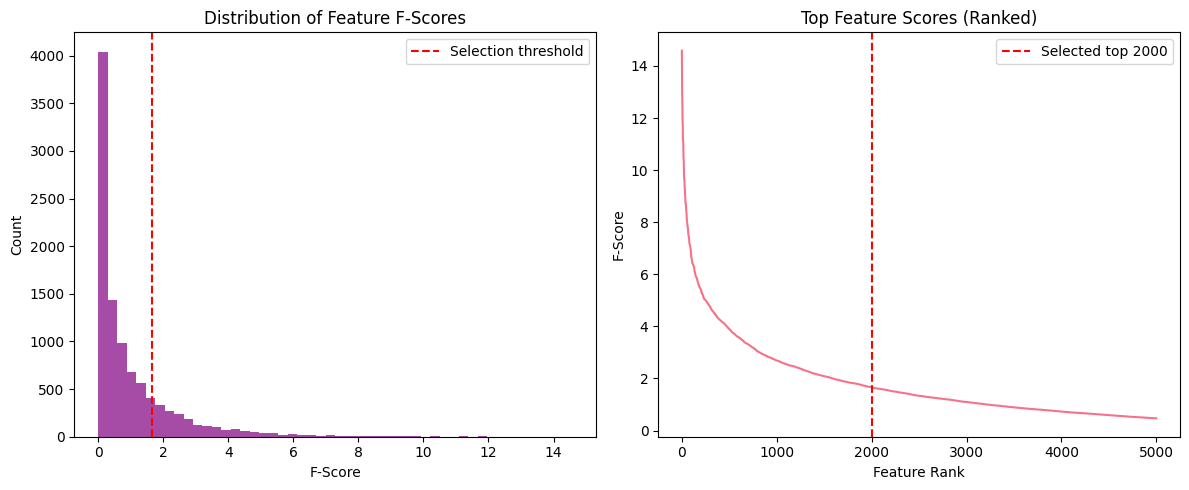

In [16]:
# Visualize feature importance
feature_scores = feature_selector.scores_
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(feature_scores, bins=50, alpha=0.7, color='purple')
plt.title('Distribution of Feature F-Scores')
plt.xlabel('F-Score')
plt.ylabel('Count')
plt.axvline(x=np.sort(feature_scores)[-n_features_to_select], color='red', 
            linestyle='--', label=f'Selection threshold')
plt.legend()

plt.subplot(1, 2, 2)
top_scores = np.sort(feature_scores)[::-1][:5000]
plt.plot(top_scores)
plt.title('Top Feature Scores (Ranked)')
plt.xlabel('Feature Rank')
plt.ylabel('F-Score')
plt.axvline(x=n_features_to_select, color='red', linestyle='--', 
            label=f'Selected top {n_features_to_select}')
plt.legend()

plt.tight_layout()
plt.show()

## 5. Summary

#### FEATURE SUMMARY:
==================================================
> Original features: 10000

> After variance threshold: 10000

> After feature selection: 2000 

> Feature reduction: 80.0%

 ### Data ready for modeling with:
 
• Robust scaling applied

• Feature selection completed

• Class weights computed

• Ready for SMOTE balancing